# Graduate Rotational Internship Programme
# The Sparks Foundation

# Task 5 => To Explore Business Analytics
    Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data? You can choose any of the tool of your choice(Python/R/Tableau/PowerBI/Excel)

In [1]:
# importting the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SST = pd.read_csv('SampleSuperstore.csv')
SST.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# lets find the shapr of the dataset
SST.shape

(9994, 13)

In [4]:
SST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# Lets find the any numll values in the dataset
SST.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
# checking if any duplicate rows is there are not in the dataset
SST.duplicated().sum()

17

In [7]:
# Remove the duplicated rows to avoid the mistakes in the accuracy 
SST.drop_duplicates(inplace=True)

In [8]:
SST.shape

(9977, 13)

In [9]:
SST['Country'].nunique()

1

In [10]:
SST['Postal Code']

0       42420
1       42420
2       90036
3       33311
4       33311
        ...  
9989    33180
9990    92627
9991    92627
9992    92627
9993    92683
Name: Postal Code, Length: 9977, dtype: int64

In [11]:
# removing the unn needed columns from the datas
SST = SST.drop(['Country' , 'Postal Code'] , axis = 1)

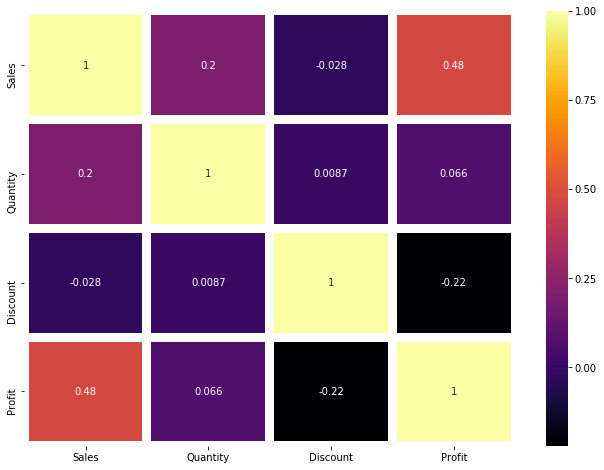

In [12]:
# lets check the correlation between the columns
f,ax = plt.subplots(figsize=(11, 8))
sns.heatmap(SST.corr(),annot=True,cmap='inferno',
            lw=8,
            linecolor='white')

### No Correlations Found in the dataset

In [13]:
SST

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [14]:
sst_con = SST.select_dtypes(include=[np.number])

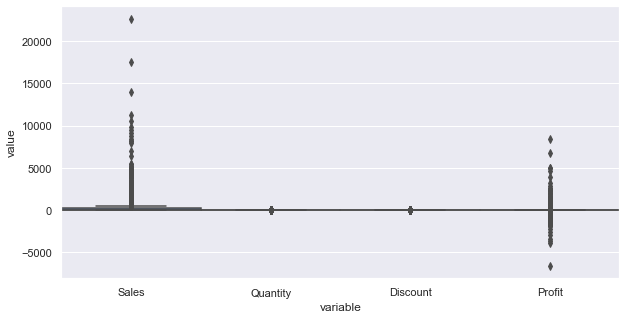

In [17]:
# Plotting using the Boxplot


plt.figure(figsize=[10, 5])
sns.set(style='darkgrid')
sns.boxplot(x = "variable" , y= 'value' , data = pd.melt(sst_con),
           width = 1)
plt.show()

In [22]:
#Removal of Outliers
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [21]:
remove_outlier(SST,k=3.33)

# Exploratory Data Analysis

In [23]:
ds.shape

(9889, 11)

In [24]:
ds.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [25]:
# Lets get the information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9889 non-null   object 
 1   Segment       9889 non-null   object 
 2   City          9889 non-null   object 
 3   State         9889 non-null   object 
 4   Region        9889 non-null   object 
 5   Category      9889 non-null   object 
 6   Sub-Category  9889 non-null   object 
 7   Sales         9889 non-null   float64
 8   Quantity      9889 non-null   int64  
 9   Discount      9889 non-null   float64
 10  Profit        9889 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 927.1+ KB


In [27]:
ds.describe()

,Sales,Quantity,Discount,Profit
count,9889.000000,9889.000000,9889.000000,9889.000000
mean,196.570036,3.776519,0.155131,24.150294
std,383.949264,2.222506,0.204991,94.164961
min,0.444000,1.000000,0.000000,-734.526400
25%,17.088000,2.000000,0.000000,1.747200
50%,52.990000,3.000000,0.200000,8.611200
75%,203.520000,5.000000,0.200000,28.857600
max,8187.650000,14.000000,0.800000,793.716000


In [36]:
for col in ds.columns:
    if ds[col].dtype== 'object':
        print('unique entries in',col +'are',ds[col].nunique())
        print("---")
        

unique entries in Ship Modeare 4
---
unique entries in Segmentare 3
---
unique entries in Cityare 531
---
unique entries in Stateare 49
---
unique entries in Regionare 4
---
unique entries in Categoryare 3
---
unique entries in Sub-Categoryare 17
---


# Visualiztion of Data

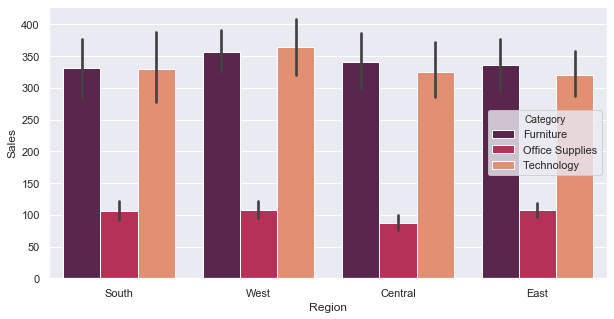

In [45]:
# Category wise sales in Each Region
plt.figure(figsize=[10,5])
ax= sns.barplot(x='Region' , y='Sales',
                hue = 'Category',
                data = ds ,
                palette="rocket" )

  #### From the above plot the office supplies is no fair and the technology and furniture are good

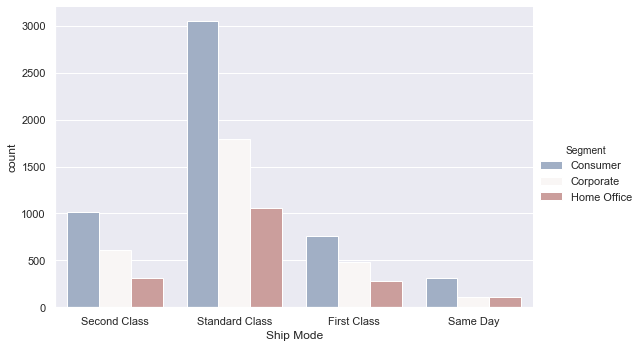

In [47]:
# Segment wise count of the ship modes

sns.catplot('Ship Mode' , hue='Segment' ,
           data = ds,
           kind = 'count',
           aspect= 1.5,
           palette = 'vlag')

### consumer count is high and they genreally prefer the standard class

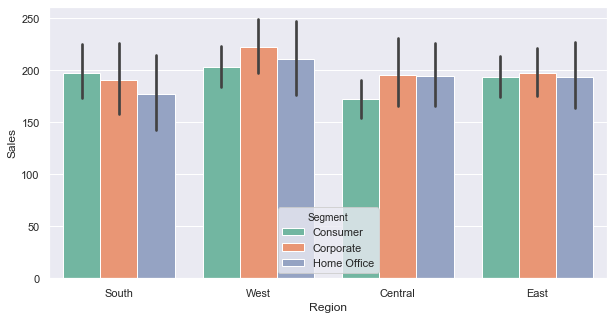

In [50]:
# Segment wise sales in Each Region

plt.figure(figsize=[10,5])
ax = sns.barplot(x='Region',
                y = 'Sales',
                hue = 'Segment',
                data = ds,
                palette = 'Set2')

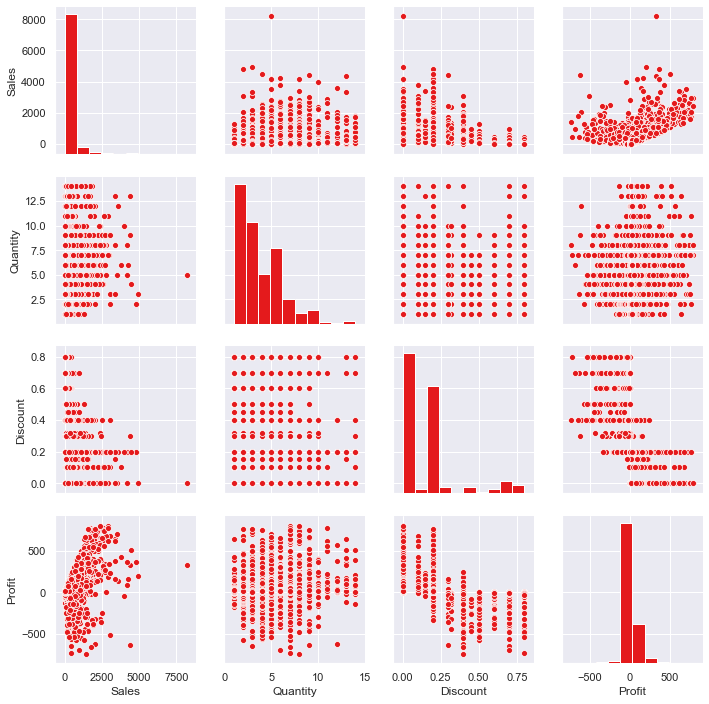

In [51]:
# Lets get some aggregated views from the pairplot

sns.set_palette('Set1')
sns.pairplot(ds)

### Obs :No Strong Relations are found 

In [52]:
# get some insisghts based on cities
grouped = ds.groupby("City")

In [53]:
# Aggregate sales per city
agg_sales = grouped['Sales'].agg(np.sum).sort_values(
ascending = False).reset_index()

In [54]:
agg_sales.head()

,City,Sales
0,New York City,197246.023
1,Los Angeles,164434.549
2,San Francisco,109777.212
3,Seattle,96250.488
4,Philadelphia,91772.849


### From the above the New york city has the most amount of sales

In [55]:
# Aggregate profit per city
agg_profit = grouped['Profit'].agg(np.sum).sort_values(
ascending = False).reset_index()
agg_profit.head()

,City,Profit
0,New York City,39934.8107
1,Los Angeles,26544.4140
2,Seattle,18916.8467
3,San Francisco,16521.1321
4,Detroit,8200.3235


### more profit is from the newyorkcity

In [56]:
#Aggregate Discount per city
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()
agg_dist.head()

,City,Discount
0,Philadelphia,173.50
1,Houston,139.54
2,Chicago,117.90
3,Dallas,55.50
4,Los Angeles,54.70


### the highest total discount is for Philadelphia

In [57]:

#Average Sales per city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
avg_sales.head()

,City,Sales
0,Cheyenne,1603.136000
1,Bellingham,1263.413333
2,Independence,1208.685000
3,Burbank,1082.386000
4,Buffalo,906.349600


In [58]:
#Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
avg_profit.head()

,City,Profit
0,Independence,487.831500
1,Appleton,277.383150
2,Burbank,254.844600
3,Lehi,225.831300
4,Beverly,218.306467


In [59]:

#Average Discount per city
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
avg_dist.head()

,City,Discount
0,Deer Park,0.8
1,Abilene,0.8
2,Missouri City,0.8
3,Romeoville,0.8
4,Littleton,0.7


###  From these average calculations, the Cities which topped the total Sales, total Profit or total Discount, are not leading here. But the overall scinerio can be obtained from these average values

In [60]:
#Cities having High Average Discounts
high_dist=avg_dist[avg_dist['Discount'] >=0.7]

#Cities having low Average Discounts
low_dist=avg_dist[avg_dist['Discount']==0]


#Cities having High Average Sales
high_sales=avg_sales[avg_sales['Sales']>500]

#Cities having low Average Sales
low_sales=avg_sales[avg_sales['Sales']<50]


#Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit']>100]

#Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit']<0]

#Cities with High-Average-Discounts but Low-Average-Sales
merged= pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Deer Park,0.8,6.924
1,Abilene,0.8,1.392
2,Missouri City,0.8,6.370
3,Romeoville,0.8,8.952
4,Pensacola,0.7,2.214
5,Elyria,0.7,1.824
6,Ormond Beach,0.7,2.808


### Insight 1 :- Here we can see 7 Cities where the Company is giving high discounts but Sales very very low. As already Discounts are high, no question of increasing discount further. Hence here our investment is not fruitful.

In [61]:
#Cities with high Average Sales as well as Average Profit
merged2= pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2

,City,Sales,Profit
0,Cheyenne,1603.136000,100.196000
1,Bellingham,1263.413333,203.530267
2,Independence,1208.685000,487.831500
3,Burbank,1082.386000,254.844600
4,Beverly,861.063333,218.306467
5,Appleton,835.655000,277.383150
6,Torrance,783.067000,136.287750
7,Lehi,758.363000,225.831300
8,Saint Peters,697.160000,146.403600
9,Norman,675.665000,134.764350


### Insight 2 :-The stats above are very pleasing. In all these 15 Cities the sales as well as profit is quite good. Hence if we can invest in these cities (in terms of Discount and other aspects), business can increase more. These can be termed as the Hot-Spots.

In [64]:
merged3= pd.merge(low_dist,high_sales, on='City', how='inner')
merged3

,City,Discount,Sales
0,Appleton,0.0,835.655000
1,Dubuque,0.0,562.433333
2,Beverly,0.0,861.063333
3,Saint Peters,0.0,697.160000
4,Noblesville,0.0,772.795000
5,Morristown,0.0,539.853333
6,Norman,0.0,675.665000
7,Independence,0.0,1208.685000
8,Harrisonburg,0.0,626.958571
9,Madison,0.0,534.679000


### Insight 3 :- These 10 cities are generating high average sales in spite of '0' discount! Hence if our investments can be increased in these cities, then huge sales as well as huge profits can be driven from these Cities. These can be termed as the Dark-Horses.

In [66]:
#Cities with high Average sales but low Average profit
merged4= pd.merge(high_sales,low_profit, on='City', how='inner')
merged4

,City,Sales,Profit
0,Richardson,644.232,-12.24465


In [67]:
#Cities with high Average discount but low Average profit
merged5= pd.merge(high_dist,low_profit, on='City', how='inner')
merged5

,City,Discount,Profit
0,Deer Park,0.8,-10.3860
1,Abilene,0.8,-3.7584
2,Missouri City,0.8,-9.5550
3,Romeoville,0.8,-14.7708
4,Littleton,0.7,-98.8018
5,Pensacola,0.7,-1.4760
6,Elyria,0.7,-1.3984
7,Ormond Beach,0.7,-1.9656


In [68]:

#Cities with low Average discount but High Average profit
merged6= pd.merge(low_dist, high_profit, on='City', how='inner')
merged6

,City,Discount,Profit
0,Appleton,0.0,277.383150
1,Vacaville,0.0,110.052800
2,Dubuque,0.0,159.224800
3,Washington,0.0,105.958930
4,Beverly,0.0,218.306467
5,Broken Arrow,0.0,115.104520
6,Saint Peters,0.0,146.403600
7,Muskogee,0.0,110.649150
8,Morristown,0.0,165.842750
9,Edmond,0.0,121.551950


### insight 6 :-Here are the 18 countries, where the company is not at all providing any discount, yet these cities are genetating good amount of profit. Hence more and more care is to be taken and investments are to be made in these kinds of Hot-Spots!

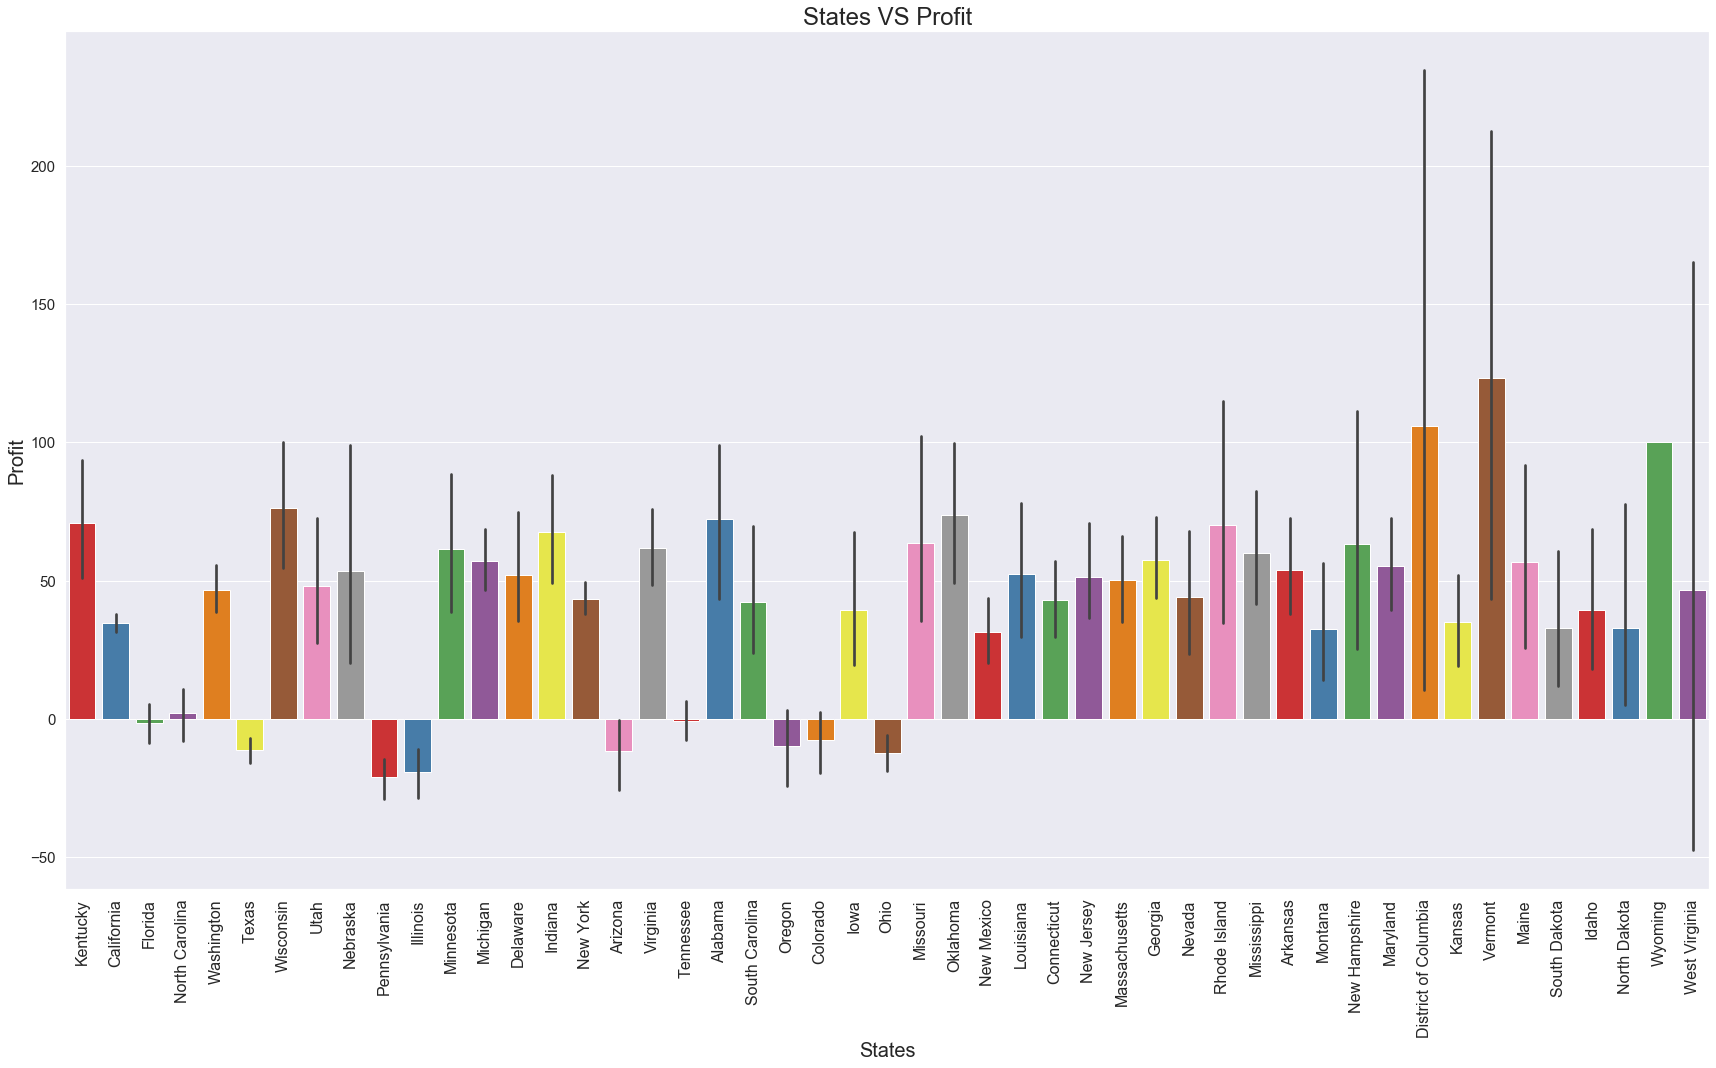

In [70]:
#State wise profit
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="Set1",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

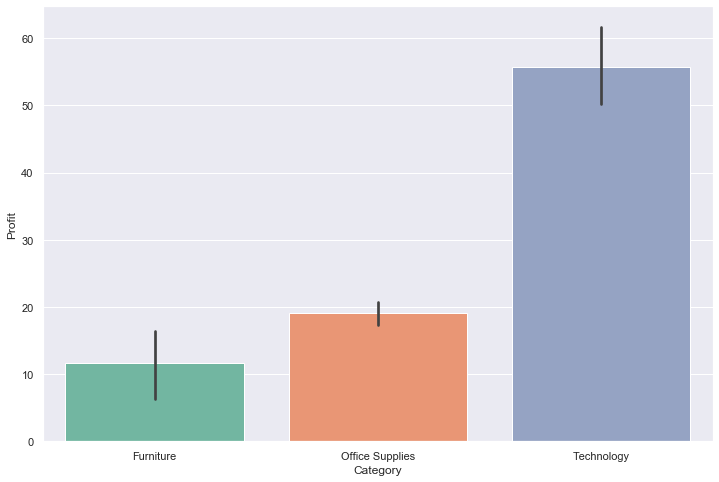

In [71]:
#Category Wise profit in the whole country
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Set2")

### Obs - Highest from Category= 'Technology'

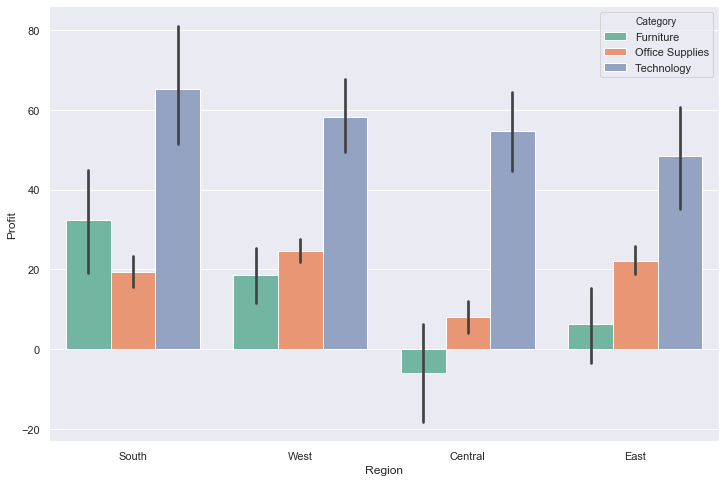

In [73]:
#Category wise Profit in Each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=ds, palette="Set2")

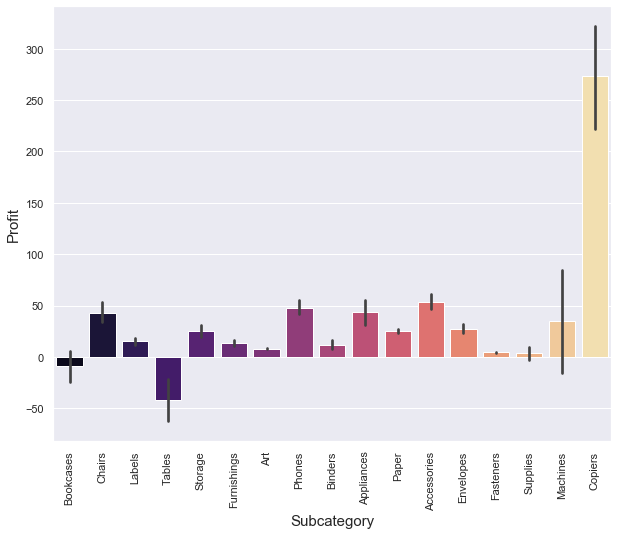

In [74]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observation:- As we can see, 'Copiers' are gaining huge profit. 'Accessories' are also doing good. But 'Tables' and 'Bookcases' are going with loss. Respective steps are to be taken to improve the business in these Subcategories

In [75]:
#Entries with Category=Technology
ds_tech=ds[(ds['Category']=="Technology")]
ds_tech.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.152,6,0.2,90.7152
11,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,911.424,4,0.2,68.3568
19,Second Class,Consumer,San Francisco,California,West,Technology,Phones,213.480,3,0.2,16.0110
26,Second Class,Consumer,Los Angeles,California,West,Technology,Accessories,90.570,3,0.0,11.7741
35,First Class,Corporate,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737


Text(0, 0.5, 'Sales')

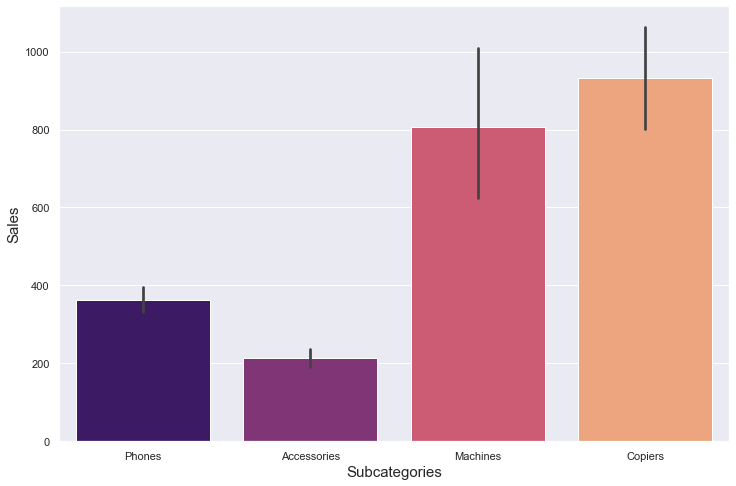

In [76]:
#Let's get the Sales of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=ds_tech, palette="magma")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

Text(0, 0.5, 'Profit')

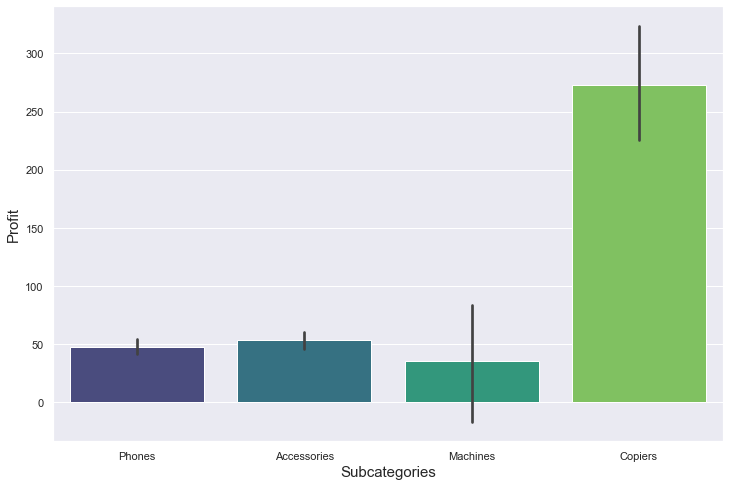

In [77]:
#Let's get the Profit of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds_tech, palette="viridis")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

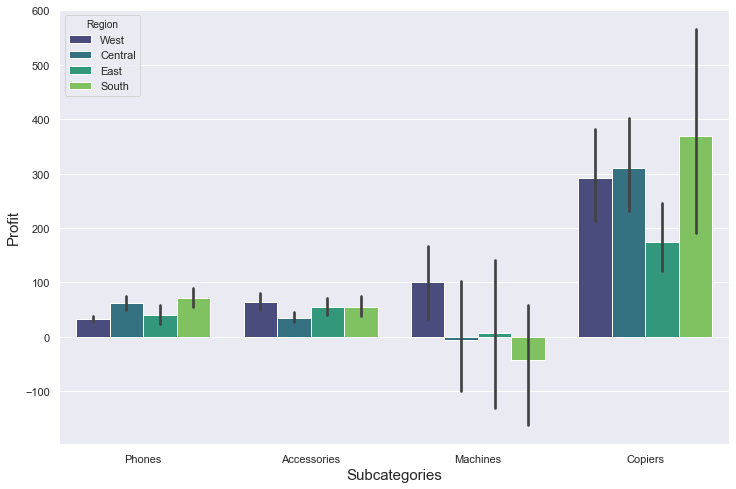

In [78]:
#Let's get the Profit of each Subcategory under Technology for each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="viridis")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

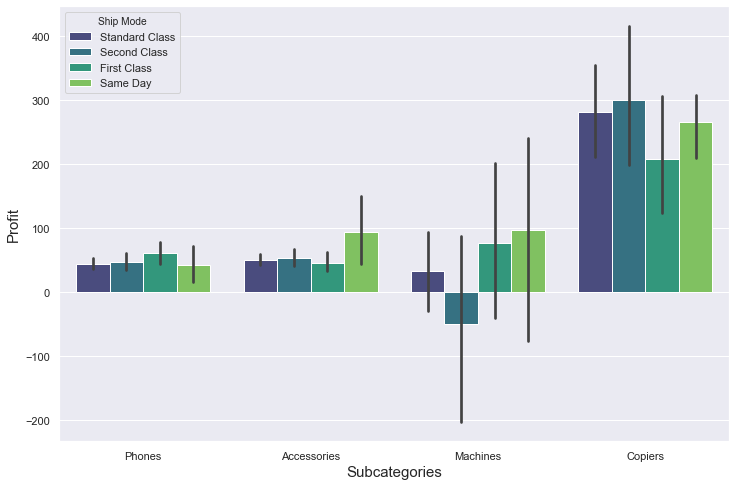

In [79]:
#Profit of each Subcategory as per the Ship-mode
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Ship Mode", data=ds_tech, palette="viridis")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

### Conclusion ==>like New York, Los Angeles, Seatle, San Francisco are generating highest amount of Sales as well as Profit. And in case of Categories, Technology is always leading in terms of Sales and Profit

# Thanks The Sparks Foundation